<div align="center">
  <h1><b> Quantum Information </b></h1>
  <h2> Review on Statistics </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [18]:
!python -V

Python 3.11.0


In [19]:
import sys
print(sys.version)

3.11.0 | packaged by conda-forge | (main, Jan 14 2023, 12:27:40) [GCC 11.3.0]


In [20]:
# Arrays/Tensors:
import numpy as np

# Fitting:
from scipy.optimize import curve_fit

# Plotting:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10}) # Enlarge matplotlib fonts.

# Table of Contents

- [Keywords](#keywords)
- [Discrete Variables](#discrete-variables)
- [Continuous Variables](#continuous-variables)
- [Central Limit Theorem](#central-limit-theorem)
- [Normal Distribution](#normal-distribution)
  - Plot of Frequency vs Normal Distribution 
  - Plot of the Probability Density Function for a Normal Distribution
  - Curve Fitting

# Keywords


- **Random (stocastic) variable $X$ with value $x_j$**: is a variable whose outcome cannot be deterministically predicted with certainty. Its value $x_j$ is the outcome of the statistical experiment, i.e, is a scalar value that has an associate probability $p_j$ of occurrence from a probability distribution $\{p_j\}_{j=1}^n$. 
  - [Discrete](https://mathworld.wolfram.com/DiscreteSet.html) random variable: assume a specific value from either a finite or a countably infinite set of possible values (a.k.a distribution).
  - Continuous random variable: assume any value within a range of possible values from an uncountable set (or uncountably infinite set). 
    - Example: values in the range [0,1].

# Discrete Variables

Consider a random variable $X$ with random values $x_j$ from some sample space denoted by $\Omega=\{x_j\}_{j=1}^{d}$ with a corresponding set of probabilities $\{P(x_j)\}_{j=1}^d$, where $d=\dim \Omega$ is the dimension of the sample space.

- **Probability of obtaining a random variable $x_j$:** is the **relative** frequency of occurrence of said random variable when the number of measurements $N$ approaches infinity.

\begin{equation}
P(x_j) := lim_{N\rightarrow\infty} \frac{N_j}{N} = \frac{\text{Number of outcomes of $x_j$}}{\text{Total no. of measurements}}.
\end{equation}

Where the probability is bounded between $0 \le P(x_j) \le 1$ and $\sum_{j=1}^{d} N_j = N$ (only one measurement outcome per measurement), such that

$$\sum_{j=1}^d P(x_j)= \sum_{j=1}^d \frac{N_j}{N} = \frac{\sum_{j=1}^d N_j}{N} = \frac{N}{N}=1.$$

- **Expected value (a.k.a population mean or weighted average) of a distribution:**

$$\mu :=  \mathbb{E}[X]  := \langle X\rangle = \sum_{j=1}^{\dim \Omega = d} x_jP(x_j),$$

where $P(x_j)$ is the probability as defined previously.

The expected value is not the most likely value of $X$ and may not even be a possible value of $X$, but it is bound by 

$$X_{\min} \leq\langle X\rangle\leq X_{\max}.$$

- Properties:

    1. $\mathbb{E}[X+Y] = \mathbb{E}[X]+ \mathbb{E}[Y].$
    
    2. $\mathbb{E}(\gamma X) = \gamma \mathbb{E}(X).$

    3. [Law of iterated expectations a.k.a law of total expectation](https://en.wikipedia.org/wiki/Law_of_total_expectation): $\mathbb{E}[\mathbb{E}[X]]=\mathbb{E}[X].$
    - Example using (2) and (3): $\mathbb{E}(2X\mathbb{E}(X)) = 2E(X\mathbb{E}(X))=2\mathbb{E}(X)\mathbb{E}(X).$

- **Expected value of a function:**

$$\langle f(X) \rangle := \sum_{j=1}^d f(x_j) P (x_j).$$

- **Mean value (a.k.a sample mean, arithmetic average or standard average):**
    
When the probability distribution is equiprobable, that is, when all probabilities are equal, the expected value equals the mean value:

\begin{equation}
\bar{x} := \sum_{j=1}^{\dim \Omega = d} x_j P(x_j) = P(x_j)\sum_{j=1}^{d} x_j = \frac{1}{d} \sum_{j=1}^{d} x_j.
\end{equation}

Another definition is:

\begin{equation}
\bar{x} := \frac{\sum_{j=1}^{d} N_j \bar{x_j}}{\sum_{j=1}^d N_j}.
\end{equation}

- **Standard deviation:** is a measure of the amount of dispersion of the data distribution relative to its mean.

$$\sigma_X := \sqrt{\langle (X-\langle X\rangle)^2\rangle} = \sqrt{\sum_{j=1}^d (x_j - \langle X \rangle)^2 P(x_j)}.$$

- **Variance:** is a measure of how distant from the mean a random variable/outcome is. A zero variance means that all values are equal.

\begin{align}
\text{Var} (X) := \mathbb{V}(x) := \sigma_X^2 &= \langle (X - \langle X \rangle)^2 \rangle \\
&= \sum_{j=1}^d  P(x_j) (x_j - \langle X \rangle)^2 \\
&=  \sum_{j=1}^d P(x_j) (x_j^2 -2x_j \langle X\rangle + \langle X\rangle^2)\\
&= \sum_{j=1}^d P(x_j) x_j^2 \\ 
&- 2\langle X\rangle \sum_{j=1}^d x_jP(x_j) \\
&+ \langle X\rangle^2 \sum_{j=1}^d P(x_j)\\
&= \langle X^2\rangle -2 \langle X \rangle \langle X \rangle + \langle X\rangle^2 \cdot 1\\
&=  \langle X^2 \rangle -2\langle X \rangle^2 + \langle X\rangle^2\\
&=\langle X^2 \rangle-\langle X\rangle^2.
\end{align}

# Continuous Variables

- **Probability density:**

In the continuous case, the probability associated to a specific value $x_j$ of a random variable $X$ loses meaning, and one must define a probability density $\rho(x)$ per infinitesimal interval $dx$, where $\rho(x)dx$ is the probability of measuring an outcome of $X$ within the interval $x$ and $x+dx$.

- **Relative frequency:**

The relative frequency of occurrence of values of $X$ within the finite interval $[a,b]$ is the sum of all probabilities in the infinitesimal intervals:

\begin{equation}
P(x\in[a,b]) = \int_a^b \rho(x)dx.
\end{equation}

The normalization condition follows:

\begin{equation}
\int_{-\infty}^{+\infty} \rho(x)dx = 1.
\end{equation}

Given the normalization condition is satisfied, while $0 \le P(x) \le 1$, one can also have: $0 \le \rho(x) \leq 1$ or $\rho(x)>1$.

- **Expected value (a.k.a population mean or weighted average):**

\begin{equation}
\langle X \rangle = \int_{-\infty}^{+\infty} x \rho(x) dx.
\end{equation}

- **Expected value of a function:**

$$\langle f(X) \rangle =  \int_{-\infty}^{+\infty} f(x) \rho(x)dx.$$

Example: $\langle X^2 \rangle = \int_{-\infty}^{+\infty} x^2 \rho(x) dx.$

- **Standard deviation:** is a measure of the amount of dispersion of the data distribution relative to its mean.

$$\sigma_X = \sqrt{\langle (X-\langle X\rangle)^2\rangle} = \sqrt{\int_{-\infty}^{+\infty} (x - \langle X \rangle)^2 \rho(x) dx}.$$

- **Variance:** is a measure of how distant from the mean a random variable/outcome is. A zero variance means that all values are equal.

\begin{equation}
\sigma_X^2 = \langle (X - \langle X \rangle)^2 \rangle = \int_{-\infty}^{+\infty} (x - \langle X \rangle)^2 \rho(x) dx = \langle X^2 \rangle - \langle X \rangle^2. 
\end{equation}

# Central Limit Theorem

"The central limit theorem states that the sum of a number of independent and identically distributed (iid) random variables with finite variances will tend to a normal distribution as the number of variables grows." —Wikipedia.

In other words, the central limit theorem (CLT) states that the probability distribution of the mean value $\langle X \rangle$ of a random variable $X$ will have an approximate standard normal distribution with a width proportional to $\frac{\sigma = 1}{\sqrt{N}}$ when this variable is measured $N$ number of times.

## Normal distribution

The [probability density function (PDF)](https://en.wikipedia.org/wiki/Probability_density_function) of a [normal (a.k.a Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution) or bell curve follows: 

$$f(x, \mu, \sigma) = \frac{1}{(\sigma \sqrt{2 \pi})}e^{\frac{-(x-\mu)^2}{2 \sigma^2}}.$$

Legend:

- $x$ denotes a random/stochastic value (of a [random variable](https://en.wikipedia.org/wiki/Random_variable) $X$) sampled from some [sample/outcome space](https://en.wikipedia.org/wiki/Sample_space).


- $\mu$ denotes the population [expected value](https://en.wikipedia.org/wiki/Expected_value) (a.k.a [population mean value or weighted average](https://en.wikipedia.org/wiki/Statistical_population#Mean)) of the distribution. 


- $\sigma$ denotes the standard deviation.


- $\sigma^2 \doteq \mathbb{V}(x)$ denotes the variance.

Takeaways:

- A standard normal distribution is a normal distribution with mean zero ($\mu=0$) and unit standard deviation ($\sigma$=1).

- The binomial distribution $(1/2^n) C(k,n)$ approaches the normal distribution when $n$ approachs infinity.

# Normal Distribution

## Plot of Frequency vs Normal Distribution

A histogram is a set $\{N_j\}_{j=1}^d$ of values where each value ($N_j$) is the frequency of occurrence of an event, i.e, the number of times the event happened.

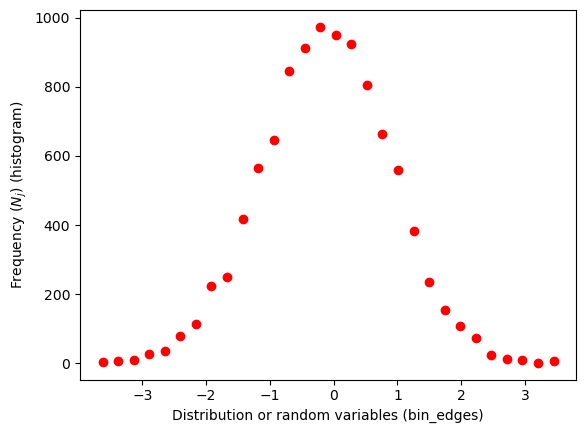

In [49]:
'''Plotting the graph of histogram vs bin_edges:'''

np.random.seed(10) # For reproducibility, i.e, it returns the same set of random values every time this cell runs.

mu=0.0 # Mean value of the distribution.
sigma=1.0 # Standard deviation of the distribution.
N=10000 # Defines the number of random variables to be used, i.e, the size of the numpy.ndarray.

distribution=np.random.normal(loc=mu, scale=sigma, size=(N)) # Creates a numpy.ndarray of Gaussian (Normal) random distributed data.
histogram, bin_edges = np.histogram(distribution, bins=30, density=False) # Unpacking the two numpy.ndarrays (histogram and bin_edges).

plt.scatter(x=bin_edges[:-1], y=histogram, color = 'red', label='histogram') # Defines a scatter plot.
plt.xlabel('Distribution or random variables (bin_edges)') # X-axis label.
plt.ylabel('Frequency ($N_j$) (histogram)') # Y-axis label.
plt.show()

In [51]:
print(f'Relevant attributes:\n')

print(f'The "distribution" variable is of type {type(distribution)} and of size {distribution.size}.\n')
print(f'The min value of the distribution is {np.amin(distribution)}.\n')
print(f'The max value of the distribution is {np.amax(distribution)}.\n\n')

print(f'The "bin_edges" variable is of type {type(bin_edges)} and of size {bin_edges.size}.\n') # bin_edges.size == (len(histogram)+1) >>> True.
print(f'The min value of bin_edges is {np.amin(bin_edges)}.\n')
print(f'The max value of bin_edges is {np.amax(bin_edges)}.\n\n')

print(f'The min value of histogram is {np.amin(histogram)}.\n')
print(f'The max value of histogram is {np.amax(histogram)}.')

Relevant attributes:

The "distribution" variable is of type <class 'numpy.ndarray'> and of size 10000.

The min value of the distribution is -3.621638796260708.

The max value of the distribution is 3.691489330393571.


The "bin_edges" variable is of type <class 'numpy.ndarray'> and of size 31.

The min value of bin_edges is -3.621638796260708.

The max value of bin_edges is 3.691489330393571.


The min value of histogram is 1.

The max value of histogram is 974.


The sum of all values $N_j$ in the histogram divided by the population size $N$ should follow the addition rule for probabilities:

$$\sum_{j=1}^d p_j= \sum_{j=1}^d \frac{N_j}{N} = \frac{\sum_{j=1}^d N_j}{N} = \frac{N}{N}=1.$$

In [52]:
print(f'The histogram is of {type(histogram)} and of size {histogram.size}.\n')
print(f'The sum of all values in the histogram divided by N is: {sum(histogram/N)}.\n\n')

The histogram is of <class 'numpy.ndarray'> and of size 30.

The sum of all values in the histogram divided by N is: 1.0.




In [53]:
sum(histogram/N) == sum(histogram)/N == 1 and True

True

## Plot of the Probability Density Function for a Normal Distribution

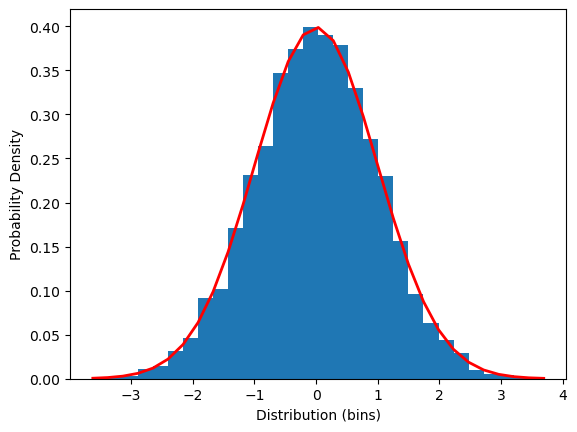

In [44]:
def gaussian_dist(mu: float, sigma: float, bins) -> np.ndarray:
  '''
  Custom function to compute the Normal Distribution.

  Args:
    mu (float): mean value.
    sigma (float): Standard deviation.
    bins (np.ndarray):
  
  Return:
    dist (np.ndarray):
  '''
  dist = 1/(sigma * np.sqrt(2 * np.pi))*np.exp(-(bins - mu)**2 / (2 * sigma**2))
  return dist

count, bins, _ = plt.hist(distribution, bins=30, density=True)
plt.plot(bins, gaussian_dist(mu, sigma, bins), linewidth=2, color='r')
plt.xlabel('Distribution (bins)') # X-axis label.
plt.ylabel('Probability Density') # Y-axis label.
plt.show()

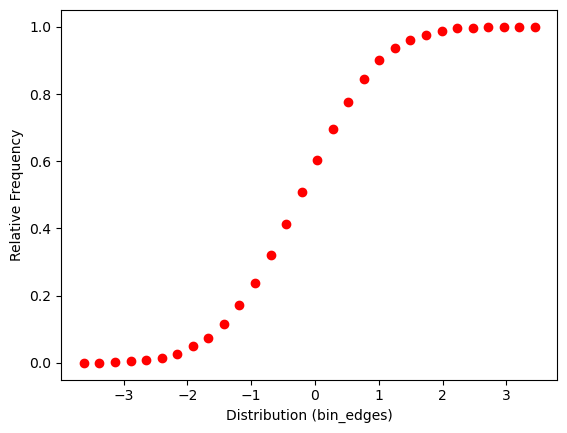

In [45]:
plt.scatter(bin_edges[:-1], np.cumsum(histogram/N), color = 'red', label='norm_histogram')
plt.xlabel('Distribution (bin_edges)') # X-axis label.
plt.ylabel('Relative Frequency') # Y-axis label.
plt.show()

## Curve Fitting

$$N(t) = N_0 e^{-\lambda t} + c.$$

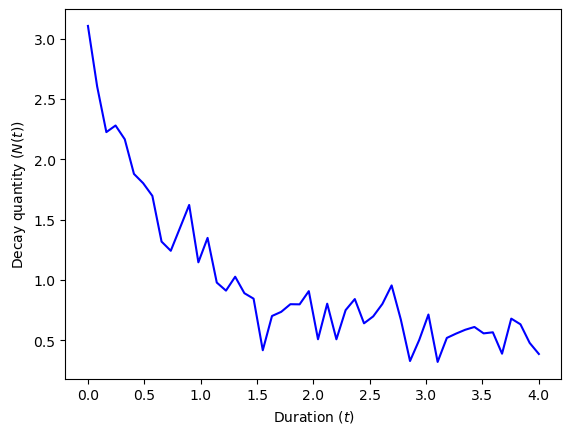

In [46]:
def exponential_decay(t: np.ndarray, N_0: float, lamb: float, c: float) -> np.ndarray:
  '''
  Function defining an exponential decay.

  Args:
    t (numpy.ndarray): a set of time step values corresponding to the duration of the decay.
    N_0 (float): the initial value at t=0.
    lamb (float): the exponential decay constant.
    c (float): a constant value.
  
  Return: 
    continous_set (numpy.ndarray): array with the exponential decayed values.
  '''
  continous_set = N_0*np.exp(-lamb*t) + c
  return continous_set

xdata = np.linspace(0, 4, 50) # (start, stop, num): a numpy.ndarray of size/len 50 (time steps) with evenly spaced values between 0 and 4.
y = exponential_decay(xdata, 2.5, 1.3, 0.5) # A numpy.ndarray with exponential decayed values.
rng = np.random.default_rng() # Define a random generator.
y_noise = 0.2 * rng.normal(size=xdata.size) # Define a numpy.ndarray with a normal distribution of random noise values (a.k.a Gaussian noise).
ydata = y + y_noise # Adding noise values to the original set.
plt.plot(xdata, ydata, 'b-', label='data') # Plotting the data.
plt.xlabel('Duration ($t$)')
plt.ylabel('Decay quantity ($N(t)$)')
plt.show()

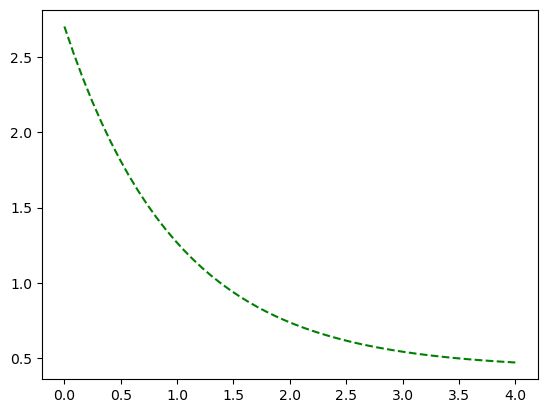

In [47]:
# Plotting the fitting curve:

popt, pcov = curve_fit(exponential_decay, xdata, ydata, bounds=(0, [3., 1., 0.5]))
#popt, pcov = curve_fit(func, xdata, ydata, [2.5, 1.3, 0.5])
plt.plot(xdata, exponential_decay(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.show()

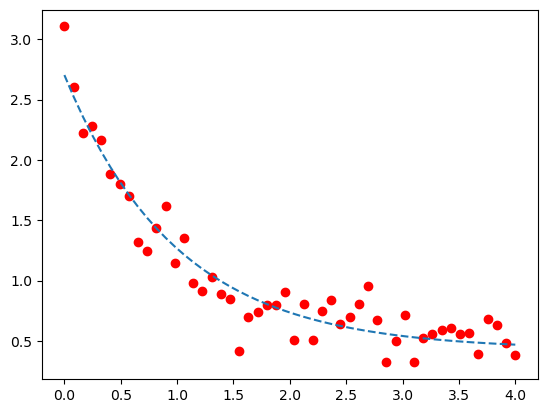

In [48]:
# Plotting the experimental data and the fitting curve:

plt.scatter(xdata, ydata, label = 'data', color = 'red')
plt.plot(xdata, exponential_decay(xdata, *popt), label = 'fit', linestyle = '--')
plt.show()